In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
data = pd.read_csv('GOOG.csv')

In [89]:
data.duplicated().sum()

0

In [90]:
data.isnull()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1254,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [91]:
data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [92]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [93]:
data['date'] = pd.to_datetime(data['date'])

In [94]:
data.dtypes

symbol                      object
date           datetime64[ns, UTC]
close                      float64
high                       float64
low                        float64
open                       float64
volume                       int64
adjClose                   float64
adjHigh                    float64
adjLow                     float64
adjOpen                    float64
adjVolume                    int64
divCash                    float64
splitFactor                float64
dtype: object

In [95]:
numerical_columns=[]
categorical_columns=[]
for column in data.columns:
  if data[column].dtype == 'object' or data[column].dtype == 'datetime64[ns, UTC]' :
    categorical_columns.append(column)
  else:
    numerical_columns.append(column)

print("Numerical Columns:",numerical_columns)
print("categorical Columns :",categorical_columns)

Numerical Columns: ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']
categorical Columns : ['symbol', 'date']


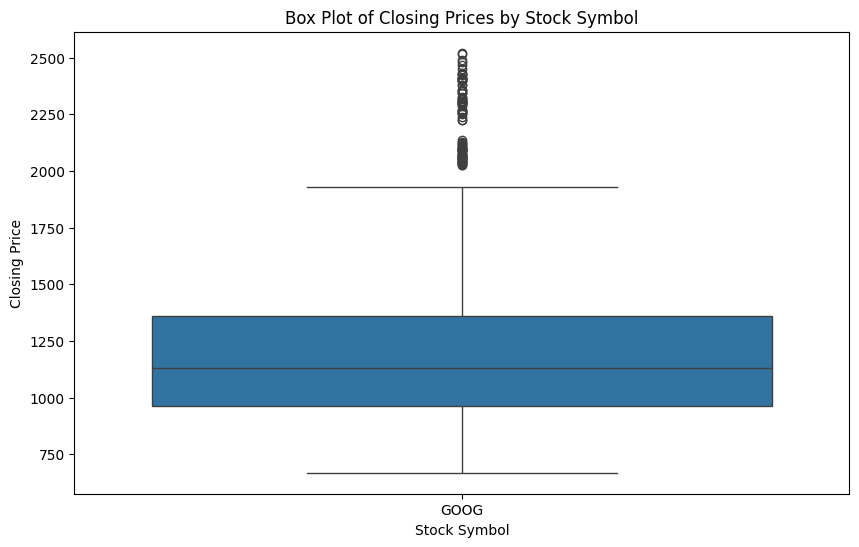

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='symbol', y='close')
plt.title('Box Plot of Closing Prices by Stock Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Closing Price')
plt.show()


In [97]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [98]:
label = LabelEncoder()
scalerx = StandardScaler()
scalery = StandardScaler()

In [99]:
encoding_mapping = {}
for column in categorical_columns:
  print(column)
  data[column] = label.fit_transform(data[column])
  encoding_mapping[column] = dict(zip(label.classes_, label.transform(label.classes_)))

symbol
date


In [100]:
encoding_mapping

{'symbol': {'GOOG': 0},
 'date': {Timestamp('2016-06-14 00:00:00+0000', tz='UTC'): 0,
  Timestamp('2016-06-15 00:00:00+0000', tz='UTC'): 1,
  Timestamp('2016-06-16 00:00:00+0000', tz='UTC'): 2,
  Timestamp('2016-06-17 00:00:00+0000', tz='UTC'): 3,
  Timestamp('2016-06-20 00:00:00+0000', tz='UTC'): 4,
  Timestamp('2016-06-21 00:00:00+0000', tz='UTC'): 5,
  Timestamp('2016-06-22 00:00:00+0000', tz='UTC'): 6,
  Timestamp('2016-06-23 00:00:00+0000', tz='UTC'): 7,
  Timestamp('2016-06-24 00:00:00+0000', tz='UTC'): 8,
  Timestamp('2016-06-27 00:00:00+0000', tz='UTC'): 9,
  Timestamp('2016-06-28 00:00:00+0000', tz='UTC'): 10,
  Timestamp('2016-06-29 00:00:00+0000', tz='UTC'): 11,
  Timestamp('2016-06-30 00:00:00+0000', tz='UTC'): 12,
  Timestamp('2016-07-01 00:00:00+0000', tz='UTC'): 13,
  Timestamp('2016-07-05 00:00:00+0000', tz='UTC'): 14,
  Timestamp('2016-07-06 00:00:00+0000', tz='UTC'): 15,
  Timestamp('2016-07-07 00:00:00+0000', tz='UTC'): 16,
  Timestamp('2016-07-08 00:00:00+0000', tz=

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,precision_recall_curve, roc_curve, roc_auc_score,auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

In [102]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [103]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, 1])
    return np.array(X), np.array(Y)

In [104]:
look_back =  3
lstm_X_train, lstm_y_train = create_dataset(train_data, look_back)
lstm_X_test, lstm_y_test = create_dataset(test_data, look_back)

In [105]:
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, len(data.columns))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [106]:
model.fit(lstm_X_train, lstm_y_train, epochs=150, batch_size=1, verbose=2)

Epoch 1/150
1002/1002 - 6s - loss: 0.0125 - 6s/epoch - 6ms/step
Epoch 2/150
1002/1002 - 3s - loss: 0.0016 - 3s/epoch - 3ms/step
Epoch 3/150
1002/1002 - 3s - loss: 0.0024 - 3s/epoch - 3ms/step
Epoch 4/150
1002/1002 - 3s - loss: 6.9295e-04 - 3s/epoch - 3ms/step
Epoch 5/150
1002/1002 - 5s - loss: 0.0019 - 5s/epoch - 5ms/step
Epoch 6/150
1002/1002 - 3s - loss: 7.9862e-04 - 3s/epoch - 3ms/step
Epoch 7/150
1002/1002 - 3s - loss: 8.5121e-04 - 3s/epoch - 3ms/step
Epoch 8/150
1002/1002 - 3s - loss: 0.0018 - 3s/epoch - 3ms/step
Epoch 9/150
1002/1002 - 5s - loss: 9.7796e-04 - 5s/epoch - 5ms/step
Epoch 10/150
1002/1002 - 3s - loss: 2.9656e-04 - 3s/epoch - 3ms/step
Epoch 11/150
1002/1002 - 3s - loss: 8.6446e-04 - 3s/epoch - 3ms/step
Epoch 12/150
1002/1002 - 3s - loss: 8.0882e-04 - 3s/epoch - 3ms/step
Epoch 13/150
1002/1002 - 4s - loss: 4.2363e-04 - 4s/epoch - 4ms/step
Epoch 14/150
1002/1002 - 3s - loss: 5.1538e-04 - 3s/epoch - 3ms/step
Epoch 15/150
1002/1002 - 3s - loss: 7.6503e-04 - 3s/epoch - 3ms

In [107]:
y_lstm_pred = model.predict(lstm_X_test)

8/8 [==============================] - 0s 3ms/step


In [108]:
y_lstm_pred

array([[1.0479003],
       [1.0506034],
       [1.0542896],
       [1.05209  ],
       [1.0624671],
       [1.0632832],
       [1.0635244],
       [1.0705346],
       [1.064004 ],
       [1.0757687],
       [1.0753707],
       [1.0767403],
       [1.0786195],
       [1.0834605],
       [1.0855656],
       [1.0915852],
       [1.0928952],
       [1.0932065],
       [1.0954759],
       [1.1025279],
       [1.1045349],
       [1.1073655],
       [1.1102319],
       [1.1112574],
       [1.1136434],
       [1.118473 ],
       [1.1191393],
       [1.1239835],
       [1.1274747],
       [1.1262419],
       [1.1329993],
       [1.1321267],
       [1.1298794],
       [1.137767 ],
       [1.1415102],
       [1.142544 ],
       [1.145239 ],
       [1.1485307],
       [1.1531613],
       [1.1536356],
       [1.1569796],
       [1.1582725],
       [1.1624666],
       [1.1655893],
       [1.1640689],
       [1.1677592],
       [1.1730764],
       [1.1752503],
       [1.1774011],
       [1.175989 ],


In [109]:
lstm_y_test = lstm_y_test.reshape(-1,1)

In [110]:
lstm_mse = mean_squared_error(lstm_y_test, y_lstm_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(lstm_y_test, y_lstm_pred)


In [111]:
print(f'Train MSE: {lstm_mse:.2f}')
print(f'Train RMSE: {lstm_rmse:.2f}')
print(f'Train R2: {lstm_r2:.2f}')

Train MSE: 0.00
Train RMSE: 0.06
Train R2: 0.91


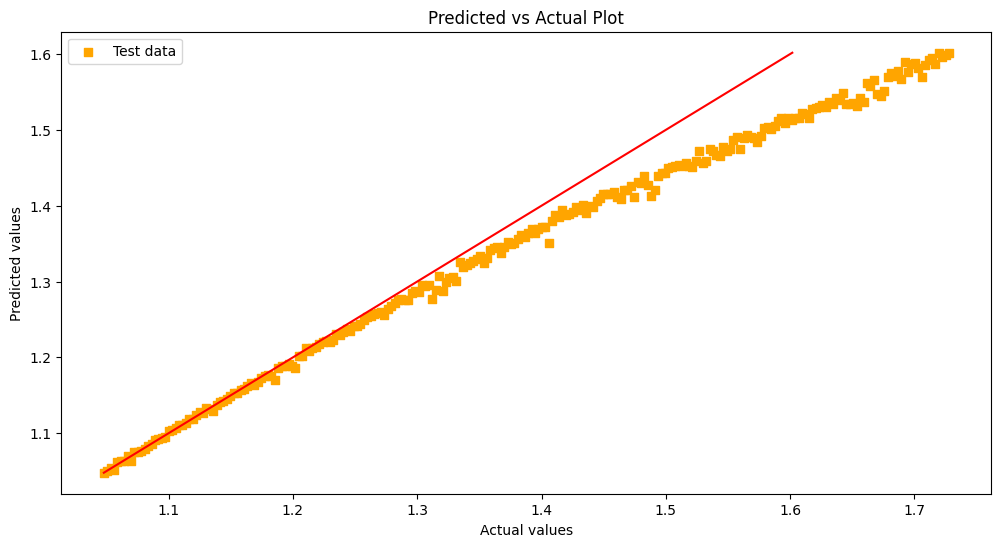

In [112]:
plt.figure(figsize=(12, 6))
plt.scatter(lstm_y_test, y_lstm_pred, c='orange', marker='s', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='upper left')
plt.plot([y_lstm_pred.min(), y_lstm_pred.max()], [y_lstm_pred.min(), y_lstm_pred.max()], color='red')
plt.title('Predicted vs Actual Plot')
plt.show()